In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import h5py
import cv2
import os 

In [1]:
class Generate_Dataset():
    def __init__(self,path,event):
        """
        path : input path to get the salvus .h5 file
        event : event in the salvus output folder 

        hf_path = path + event + '/output.h5'
        """
        self.path = path
        self.event = event

        self.hf_path = self.path + self.event + '/output.h5'

        self.hf = h5py.File(self.hf_path, 'r')

    def save_figures(self,folder_name,start,end,offset=4):
        """
        start : first output wavefield to predict
        end : last output wavefield to predict
        offset : number of wavefield to predict the output
        """

        # Create output dir 
        if not os.path.exists(folder_name):
            os.mkdir(folder_name)

        # # # Store all the pictures

        # CSV to store figure
        df_figure = pd.DataFrame()
        df_figure['X'] = self.hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
        df_figure['Y'] = self.hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)

        for fig_i in range(start-offset,end+1):

            df_figure['Pressure'] = self.hf['volume']['phi'][fig_i][:,0].mean(axis=1) # Add pressure

            df_show = df_figure.pivot_table(values='Pressure',index='Y',columns='X').sort_index(axis=0,ascending=False) # Pivot Table to reorder the data

            name_0 = f'{self.event}_{fig_i}.tiff'
            cv2.imwrite(folder_name + name_0,df_show.values) # Save figure

    def save_csv(self,file_name,start,end):
        # # # Create the dataset in CSV

        # Check if csv file already exists
        try:
            pd.read_csv(file_name,index_col=0)

        except FileNotFoundError:
            # CSV to store figure name
            csv_name = pd.DataFrame()

            for i,fig_i in enumerate(range(start,end+1)):
                name_0 = f'{self.event}_{fig_i}.tiff'

                csv_name.loc[i,'y'] = name_0
                csv_name.loc[i,'y_number'] = fig_i

            # Save csv with figure name
            csv_name.to_csv(file_name)
        else: 

            df_all = pd.read_csv(file_name,index_col=0)

            # CSV to store figure name
            csv_name = pd.DataFrame()

            for i,fig_i in enumerate(range(start,end+1)):
                name_0 = f'{self.event}_{fig_i}.tiff'

                csv_name.loc[i,'y'] = name_0
                csv_name.loc[i,'y_number'] = fig_i

            # Save csv with figure name
            df_all = pd.concat([df_all, csv_name],axis=0,ignore_index=True)
            df_all.to_csv(file_name)

In [3]:
# Moseley Homogeneous 0 - Test With Moseley

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Homogeneous/' #'Moseley_EARTH/'
start = 10
end = 200

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_Homogeneous.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

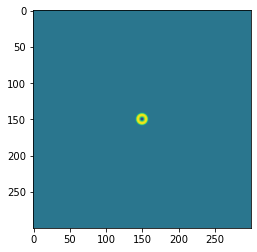

In [23]:
# # # Small data - First timestep
df_test = pd.DataFrame()
df_test['X'] = gen_dataset.hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_test['Y'] = gen_dataset.hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)
df_test['True'] = gen_dataset.hf['volume']['phi'][start][:,0].mean(axis=1)

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

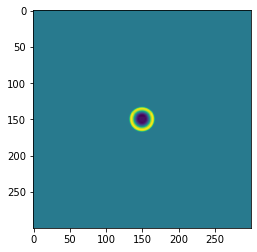

In [24]:
# # # Small data - Last timestep
df_test = pd.DataFrame()
df_test['X'] = gen_dataset.hf['coordinates_ACOUSTIC'][:,0][:,0].astype(float)
df_test['Y'] = gen_dataset.hf['coordinates_ACOUSTIC'][:,0][:,1].astype(float)
df_test['True'] = gen_dataset.hf['volume']['phi'][end][:,0].mean(axis=1)

# Pivot Table to reorder the data
df_show = df_test.pivot_table(values='True',index='Y',columns='X').sort_index(axis=0,ascending=False)

# Plot
plt.imshow(df_show.values)

In [6]:
# Moseley Homogeneous 1 - Source in the middle with 400 wavefields

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous_1/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Homogeneous_1/' #'Moseley_EARTH/'
start = 10
end = 400

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_Homogeneous_1.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [68]:
# Moseley Homogeneous 2 - Source at x = 1000, y = 1000 with 200 wavefields

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous_2/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Homogeneous_2/' #'Moseley_EARTH/'
start = 10
end = 200

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_Homogeneous_2.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [109]:
# Moseley Homogeneous 3 - Sources on the edges with 200 wavefields

np.random.seed(0)

list_all = np.random.choice(range(12),size=12,replace=False)

list_train = list_all[:8]
list_test = list_all[8:]

events_train, events_test = ["EVENT{0:04}".format(i) for i in list_train],["EVENT{0:04}".format(i) for i in list_test] 

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Homogeneous_3/"

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Homogeneous_3/' #'Moseley_EARTH/'
start = 10
end = 200

for event in events_train:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Homogeneous_3_Train.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

for event in events_test:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Homogeneous_3_Test.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [101]:
# Moseley Earth 0 - Source in the middle with 200 wavefields

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_EARTH/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_EARTH/' #'Moseley_EARTH/'
start = 10
end = 200

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_EARTH.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [102]:
# Moseley Earth 1 - Source in the middle with 400 wavefields

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_EARTH_1/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_EARTH_1/' #'Moseley_EARTH/'
start = 10
end = 400

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_EARTH_1.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [103]:
# Moseley Earth 2 - Source at x = 1000, y = 1000 with 200 wavefields

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_EARTH_2/"
event = 'Event0000'

gen_dataset = Generate_Dataset(path=path,event=event)

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_EARTH_2/' #'Moseley_EARTH/'
start = 10
end = 200

gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

file_name = '../Training_Data/Moseley_EARTH_2.csv'

gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [108]:
# Moseley Homogeneous 3 - Sources on the edges with 200 wavefields

np.random.seed(0)

list_all = np.random.choice(range(12),size=12,replace=False)

list_train = list_all[:8]
list_test = list_all[8:]

events_train, events_test = ["EVENT{0:04}".format(i) for i in list_train],["EVENT{0:04}".format(i) for i in list_test] 

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_EARTH_3/"

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_EARTH_3/' #'Moseley_EARTH/'
start = 10
end = 200

for event in events_train:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_EARTH_3_Train.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

for event in events_test:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_EARTH_3_Test.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [106]:
# Moseley Crack 1 - Sources on the edges with 200 wavefields

np.random.seed(0)

list_all = np.random.choice(range(12),size=12,replace=False)

list_train = list_all[:8]
list_test = list_all[8:]

events_train, events_test = ["EVENT{0:04}".format(i) for i in list_train],["EVENT{0:04}".format(i) for i in list_test] 

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Crack_1/"

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Crack_1/' #'Moseley_EARTH/'
start = 10
end = 200

for event in events_train:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Crack_1_Train.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

for event in events_test:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Crack_1_Test.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

In [107]:
# Moseley Crack 2 - Sources on the edges with 200 wavefields

np.random.seed(0)

list_all = np.random.choice(range(12),size=12,replace=False)

list_train = list_all[:8]
list_test = list_all[8:]

events_train, events_test = ["EVENT{0:04}".format(i) for i in list_train],["EVENT{0:04}".format(i) for i in list_test] 

# Path to get the data
path = f"E:/PDM_SALVUS/NoCrack/Moseley_Crack_2/"

# Path to save the .tiff files
folder_name = '../Training_Data/Moseley_Crack_2/' #'Moseley_EARTH/'
start = 10
end = 200

for event in events_train:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Crack_2_Train.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)

for event in events_test:
    gen_dataset = Generate_Dataset(path=path,event=event)

    gen_dataset.save_figures(folder_name=folder_name,start=start,end=end)

    file_name = '../Training_Data/Moseley_Crack_2_Test.csv'

    gen_dataset.save_csv(file_name=file_name,start=start,end=end)